#
---
# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import torch
%load_ext Cython
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, fbeta_score, precision_score, recall_score, average_precision_score

#
---
# Importing Dataset

In [6]:
""""
data = np.load('data.npz')
trainx = data['arr1']
trainy = data['arr2']
testx = data['arr3']
testy = data['arr4']
"""

df_log = pd.read_csv('df_log.csv')
labels = df_log['cardio'].to_numpy()
df_log_processed = df_log.drop(columns=['cardio'])
data = df_log_processed.to_numpy()
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.15, random_state=42)

# Standardization
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both the training and test data
trainx = scaler.fit_transform(trainx)
testx = scaler.transform(testx)

In [7]:
df_log

height  cholesterol  gluc  smoke  active  cardio  age_years  \
0      5.123964            1     1      0       1       0   3.931826   
1      5.049856            3     1      0       1       1   4.025352   
2      5.105945            3     1      0       0       1   3.951244   
3      5.129899            1     1      0       1       1   3.891820   
4      5.049856            1     1      0       0       0   3.871201   
...         ...          ...   ...    ...     ...     ...        ...   
65918  5.105945            1     1      0       1       1   4.060443   
65919  5.123964            1     1      1       1       0   3.970292   
65920  5.209486            3     1      0       0       1   3.970292   
65921  5.093750            1     2      0       0       1   4.127134   
65922  5.135798            2     1      0       1       0   4.043051   

            bmi  bp_category_Elevated  bp_category_Hypertension Stage 1  \
0      3.089547                     0                                 1   
1      3.553280                     0                                 0   
2      3.157333                     0                                 1   
3      3.357262                     0                                 0   
4      3.135980                     0                                 0   
...         ...                   ...                               ...   
65918  3.380476                     0                                 1   
65919  3.293146                     0                                 1   
65920  3.445328                     0                                 0   
65921  3.299506                     0                                 1   
65922  3.215410                     0                                 1   

       bp_category_Hypertension Stage 2  bp_category_Normal  pulse_pressure  
0                                     0                   0        3.433987  
1                                     1                   0        3.931826  
2                                     0                   0        4.110874  
3                                     1                   0        3.931826  
4                                     0                   1        3.713572  
...                                 ...                 ...             ...  
65918                                 0                   0        4.262680  
65919                                 0                   0        3.713572  
65920                                 1                   0        4.510860  
65921                                 0                   0        4.025352  
65922                                 0                   0        3.713572  

[65923 rows x 13 columns]

#
---
# Machine Learning Models

#### ◉ Logistic Regression (Python)

Best Parameters: {'C': 0.05, 'penalty': 'l2'}
Training Accuracy: 0.717653567476889
Accuracy: 0.719890787743958
AUC: 0.7194210163556897
F1-score: 0.6953365596128463
F2-score: 0.6631283041033817
Precision per class: [0.6930485 0.7565821]
Average Precision: 0.663949805390537
Weighted Average Recall: 0.719890787743958
Classification Report:
               precision    recall  f1-score   support

           0    0.69305   0.79558   0.74078      4975
           1    0.75658   0.64326   0.69534      4914

    accuracy                        0.71989      9889
   macro avg    0.72482   0.71942   0.71806      9889
weighted avg    0.72462   0.71989   0.71820      9889



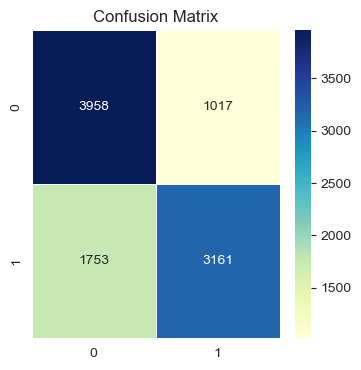

True Positive Cases: 3161
True Negative Cases: 3958
False Positive Cases: 1017
False Negative Cases: 1753
CPU times: total: 2min 54s
Wall time: 1min 57s


In [66]:
%%time
# Define the Logistic Regression model
model = LogisticRegression(solver='saga', max_iter=100000)

# Define the parameter grid for Grid Search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
}

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(trainx, trainy)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_model = LogisticRegression(**best_params, solver='saga', max_iter=100000)
best_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = best_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = best_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ Logistic Regression (Cython + Parallelized GridSearchCV Process)

In [67]:
%%cython -a
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, fbeta_score, precision_score, recall_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from joblib import parallel_backend
import seaborn as sns
cimport numpy as np
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)

def logistic_regression_cython(np.ndarray[np.float64_t, ndim=2] trainx, np.ndarray[np.int64_t, ndim=1] trainy, np.ndarray[np.float64_t, ndim=2] testx, np.ndarray[np.int64_t, ndim=1] testy):
    # Define the Logistic Regression model
    model = LogisticRegression(solver='saga', max_iter=100000)

    # Define the parameter grid for Grid Search
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
    }

    with parallel_backend('multiprocessing', n_jobs=-1):
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

        # Fit the model to find the best parameters
        grid_search.fit(trainx, trainy)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Use the best parameters to create the final model
    best_model = LogisticRegression(**best_params, solver='saga', max_iter=100000)
    best_model.fit(trainx, trainy)

    # Make predictions on the training set
    trainy_pred = best_model.predict(trainx)

    # Evaluate the model on the training set
    accuracy_train = accuracy_score(trainy, trainy_pred)
    print("Training Accuracy:", accuracy_train)

    # Make predictions on the test set
    testy_pred = best_model.predict(testx)

    # Evaluate the model on the test set
    accuracy = accuracy_score(testy, testy_pred)
    report = classification_report(testy, testy_pred, digits=5)
    auc = roc_auc_score(testy, testy_pred)
    f2 = fbeta_score(testy, testy_pred, beta=2)
    precision_per_class = precision_score(testy, testy_pred, average=None)
    f1 = fbeta_score(testy, testy_pred, beta=1)
    average_precision = average_precision_score(testy, testy_pred)
    weighted_recall = recall_score(testy, testy_pred, average='weighted')

    # Additional Metrics
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1-score:", f1)
    print("F2-score:", f2)
    print("Precision per class:", precision_per_class)
    print("Average Precision:", average_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Classification Report:\n", report)

    # Confusion Matrix Visualization
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.show()

    # True Positive, True Negative, False Positive, False Negative
    tp = confusion_matrix(testy, testy_pred)[1][1]
    tn = confusion_matrix(testy, testy_pred)[0][0]
    fp = confusion_matrix(testy, testy_pred)[0][1]
    fn = confusion_matrix(testy, testy_pred)[1][0]

    print('True Positive Cases: {}'.format(tp))
    print('True Negative Cases: {}'.format(tn))
    print('False Positive Cases: {}'.format(fp))
    print('False Negative Cases: {}'.format(fn))

Exception ignored in: <function Pool.__del__ at 0x000001B18D068CC0>
Traceback (most recent call last):
  File "C:\Users\Home\anaconda3\Lib\multiprocessing\pool.py", line 267, in __del__
    if self._state == RUN:
       ^^^^^^^^^^^
AttributeError: 'MemmappingPool' object has no attribute '_state'


Best Parameters: {'C': 0.5, 'penalty': 'l2'}
Training Accuracy: 0.717671413784488
Accuracy: 0.7199919102032561
AUC: 0.7195227664574397
F1-score: 0.6954800395908941
F2-score: 0.6633102580239145
Precision per class: [0.69316988 0.75664034]
Average Precision: 0.6640401281699302
Weighted Average Recall: 0.7199919102032561
Classification Report:
               precision    recall  f1-score   support

           0    0.69317   0.79558   0.74085      4975
           1    0.75664   0.64347   0.69548      4914

    accuracy                        0.71999      9889
   macro avg    0.72491   0.71952   0.71817      9889
weighted avg    0.72471   0.71999   0.71831      9889



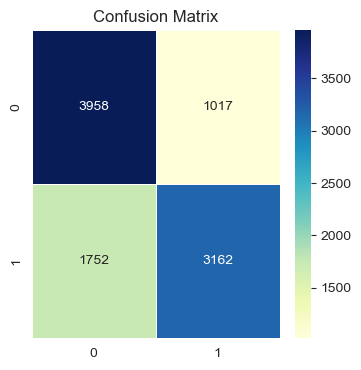

True Positive Cases: 3162
True Negative Cases: 3958
False Positive Cases: 1017
False Negative Cases: 1752
CPU times: total: 1.7 s
Wall time: 56.7 s


In [68]:
%%time
logistic_regression_cython(trainx, trainy, testx, testy)

---
#### ◉ k-Nearst Neighbors (k-NN) (Python)

Best Parameters: {'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}
Training Accuracy: 0.7316272263268729
Accuracy: 0.7221154818485186
AUC: 0.721768058853486
F1-score: 0.7041343669250646
F2-score: 0.6803995006242197
Precision per class: [0.7019039  0.74759945]
Average Precision: 0.6637321374454997
Weighted Average Recall: 0.7221154818485186
Classification Report:
               precision    recall  f1-score   support

           0    0.70190   0.77809   0.73804      4975
           1    0.74760   0.66545   0.70413      4914

    accuracy                        0.72212      9889
   macro avg    0.72475   0.72177   0.72109      9889
weighted avg    0.72461   0.72212   0.72119      9889



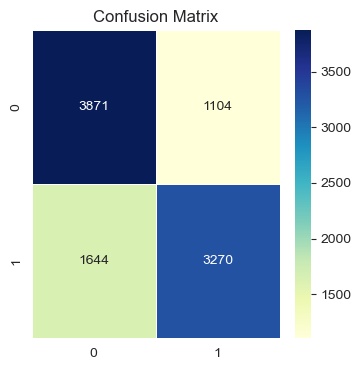

True Positive Cases: 3270
True Negative Cases: 3871
False Positive Cases: 1104
False Negative Cases: 1644
CPU times: total: 5min 17s
Wall time: 5min 18s


In [69]:
%%time
# Define the K-NN model
knn_model = KNeighborsClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 11, 19, 27, 35],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(trainx, trainy)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = best_knn_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = best_knn_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ k-Nearst Neighbors (k-NN) (Cython + Parallelized GridSearchCV Process)

In [70]:
%%cython -a
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, fbeta_score, precision_score, recall_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from joblib import parallel_backend
import seaborn as sns
cimport numpy as np
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)

cpdef knn_cython(np.ndarray[np.float64_t, ndim=2] trainx, np.ndarray[np.int64_t, ndim=1] trainy, np.ndarray[np.float64_t, ndim=2] testx, np.ndarray[np.int64_t, ndim=1] testy):
    # Define the K-NN model
    knn_model = KNeighborsClassifier()

    # Define the parameter grid for Grid Search
    param_grid = {
        'n_neighbors': [3, 11, 19, 27, 35],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    with parallel_backend('multiprocessing', n_jobs=-1):
        # Create Grid Search with cross-validation
        grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

        # Fit the model to find the best parameters
        grid_search.fit(trainx, trainy)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Use the best parameters to create the final model
    best_knn_model = KNeighborsClassifier(**best_params)
    best_knn_model.fit(trainx, trainy)

    # Make predictions on the training set
    trainy_pred = best_knn_model.predict(trainx)

    # Evaluate the model on the training set
    accuracy_train = accuracy_score(trainy, trainy_pred)
    print("Training Accuracy:", accuracy_train)

    # Make predictions on the test set
    testy_pred = best_knn_model.predict(testx)

    # Evaluate the model on the test set
    accuracy = accuracy_score(testy, testy_pred)
    report = classification_report(testy, testy_pred, digits=5)
    auc = roc_auc_score(testy, testy_pred)
    f2 = fbeta_score(testy, testy_pred, beta=2)
    precision_per_class = precision_score(testy, testy_pred, average=None)
    f1 = fbeta_score(testy, testy_pred, beta=1)
    average_precision = average_precision_score(testy, testy_pred)
    weighted_recall = recall_score(testy, testy_pred, average='weighted')

    # Additional Metrics
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1-score:", f1)
    print("F2-score:", f2)
    print("Precision per class:", precision_per_class)
    print("Average Precision:", average_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Classification Report:\n", report)

    # Confusion Matrix Visualization
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.show()

    # True Positive, True Negative, False Positive, False Negative
    tp = confusion_matrix(testy, testy_pred)[1][1]
    tn = confusion_matrix(testy, testy_pred)[0][0]
    fp = confusion_matrix(testy, testy_pred)[0][1]
    fn = confusion_matrix(testy, testy_pred)[1][0]

    print('True Positive Cases: {}'.format(tp))
    print('True Negative Cases: {}'.format(tn))
    print('False Positive Cases: {}'.format(fp))
    print('False Negative Cases: {}'.format(fn))

Best Parameters: {'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}
Training Accuracy: 0.7316272263268729
Accuracy: 0.7221154818485186
AUC: 0.721768058853486
F1-score: 0.7041343669250646
F2-score: 0.6803995006242197
Precision per class: [0.7019039  0.74759945]
Average Precision: 0.6637321374454997
Weighted Average Recall: 0.7221154818485186
Classification Report:
               precision    recall  f1-score   support

           0    0.70190   0.77809   0.73804      4975
           1    0.74760   0.66545   0.70413      4914

    accuracy                        0.72212      9889
   macro avg    0.72475   0.72177   0.72109      9889
weighted avg    0.72461   0.72212   0.72119      9889



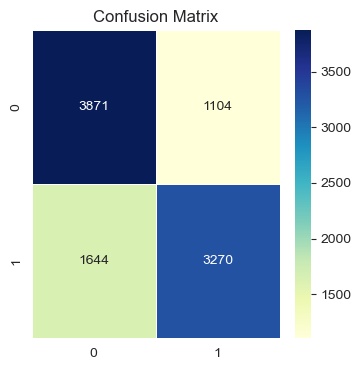

True Positive Cases: 3270
True Negative Cases: 3871
False Positive Cases: 1104
False Negative Cases: 1644
CPU times: total: 25.9 s
Wall time: 3min 15s


In [71]:
%%time
knn_cython(trainx, trainy, testx, testy)

---
#### ◉ Random Forest (Python)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training Accuracy: 0.7391940607488311
Accuracy: 0.728587319243604
AUC: 0.7281078980576469
F1-score: 0.7042750110180697
F2-score: 0.670921152069863
Precision per class: [0.70001746 0.76790005]
Average Precision: 0.6731603251597971
Weighted Average Recall: 0.7285873192436039
Classification Report:
               precision    recall  f1-score   support

           0    0.70002   0.80583   0.74921      4975
           1    0.76790   0.65039   0.70428      4914

    accuracy                        0.72859      9889
   macro avg    0.73396   0.72811   0.72674      9889
weighted avg    0.73375   0.72859   0.72688      9889



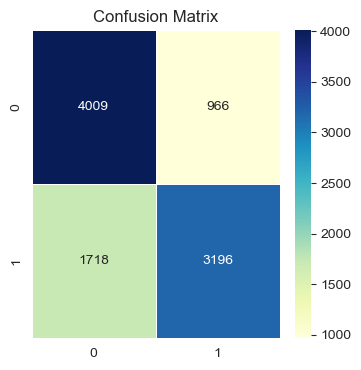

True Positive Cases: 3196
True Negative Cases: 4009
False Positive Cases: 966
False Negative Cases: 1718
CPU times: total: 1h 25min 1s
Wall time: 1h 25min 14s


In [72]:
%%time
# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 6]
}

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(trainx, trainy)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = best_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = best_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ Random Forest (Cython + Parallelized GridSearchCV Process)

In [73]:
%%cython -a
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, fbeta_score, precision_score, recall_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from joblib import parallel_backend
import seaborn as sns
cimport numpy as np
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)

def random_forest_cython(np.ndarray[np.float64_t, ndim=2] trainx, np.ndarray[np.int64_t, ndim=1] trainy, np.ndarray[np.float64_t, ndim=2] testx, np.ndarray[np.int64_t, ndim=1] testy):
    # Define the Random Forest model
    model = RandomForestClassifier(random_state=42)

    # Define the parameter grid for Grid Search
    param_grid = {
        'n_estimators': [200, 300],
        'max_depth': [None, 10, 20, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 6]
    }

    with parallel_backend('multiprocessing', n_jobs=-1):
        # Create Grid Search with cross-validation
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

        # Fit the model to find the best parameters
        grid_search.fit(trainx, trainy)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Use the best parameters to create the final model
    best_model = RandomForestClassifier(random_state=42, **best_params)
    best_model.fit(trainx, trainy)

    # Make predictions on the training set
    trainy_pred = best_model.predict(trainx)

    # Evaluate the model on the training set
    accuracy_train = accuracy_score(trainy, trainy_pred)
    print("Training Accuracy:", accuracy_train)

    # Make predictions on the test set
    testy_pred = best_model.predict(testx)

    # Evaluate the model on the test set
    accuracy = accuracy_score(testy, testy_pred)
    report = classification_report(testy, testy_pred, digits=5)
    auc = roc_auc_score(testy, testy_pred)
    f2 = fbeta_score(testy, testy_pred, beta=2)
    precision_per_class = precision_score(testy, testy_pred, average=None)
    f1 = fbeta_score(testy, testy_pred, beta=1)
    average_precision = average_precision_score(testy, testy_pred)
    weighted_recall = recall_score(testy, testy_pred, average='weighted')

    # Additional Metrics
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1-score:", f1)
    print("F2-score:", f2)
    print("Precision per class:", precision_per_class)
    print("Average Precision:", average_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Classification Report:\n", report)

    # Confusion Matrix Visualization
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.show()

    # True Positive, True Negative, False Positive, False Negative
    tp = confusion_matrix(testy, testy_pred)[1][1]
    tn = confusion_matrix(testy, testy_pred)[0][0]
    fp = confusion_matrix(testy, testy_pred)[0][1]
    fn = confusion_matrix(testy, testy_pred)[1][0]

    print('True Positive Cases: {}'.format(tp))
    print('True Negative Cases: {}'.format(tn))
    print('False Positive Cases: {}'.format(fp))
    print('False Negative Cases: {}'.format(fn))

Content of stdout:
_cython_magic_8d954201b5e1c9b66f81d3cb59a8d3954f1c36c1.c
C:\Users\Home\anaconda3\Lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
   Creating library C:\Users\Home\.ipython\cython\Users\Home\.ipython\cython\_cython_magic_8d954201b5e1c9b66f81d3cb59a8d3954f1c36c1.cp311-win_amd64.lib and object C:\Users\Home\.ipython\cython\Users\Home\.ipython\cython\_cython_magic_8d954201b5e1c9b66f81d3cb59a8d3954f1c36c1.cp311-win_amd64.exp
Generating code
Finished generating code

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Training Accuracy: 0.7391940607488311
Accuracy: 0.728587319243604
AUC: 0.7281078980576469
F1-score: 0.7042750110180697
F2-score: 0.670921152069863
Precision per class: [0.70001746 0.76790005]
Average Precision: 0.6731603251597971
Weighted Average Recall: 0.7285873192436039
Classification Report:
               precision    recall  f1-score   support

           0    0.70002   0.80583   0.74921      4975
           1    0.76790   0.65039   0.70428      4914

    accuracy                        0.72859      9889
   macro avg    0.73396   0.72811   0.72674      9889
weighted avg    0.73375   0.72859   0.72688      9889



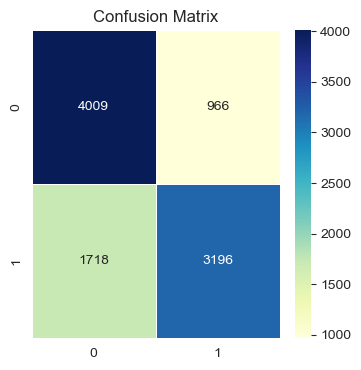

True Positive Cases: 3196
True Negative Cases: 4009
False Positive Cases: 966
False Negative Cases: 1718
CPU times: total: 15 s
Wall time: 24min 52s


In [74]:
%%time
random_forest_cython(trainx, trainy, testx, testy)

---
#### ◉ XGBoost (Python)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.8}
Training Accuracy: 0.7289145875718314
Accuracy: 0.7316209930225503
AUC: 0.73126145583432
F1-score: 0.7136383254208027
F2-score: 0.6886713869221157
Precision per class: [0.70966576 0.75953147]
Average Precision: 0.6736496113455304
Weighted Average Recall: 0.7316209930225503
Classification Report:
               precision    recall  f1-score   support

           0    0.70967   0.78955   0.74748      4975
           1    0.75953   0.67298   0.71364      4914

    accuracy                        0.73162      9889
   macro avg    0.73460   0.73126   0.73056      9889
weighted avg    0.73444   0.73162   0.73066      9889



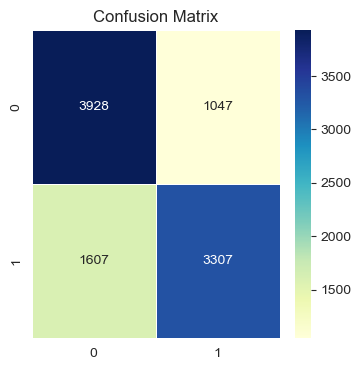

True Positive Cases: 3307
True Negative Cases: 3928
False Positive Cases: 1047
False Negative Cases: 1607
CPU times: total: 8h 49min 44s
Wall time: 2h 17min 14s


In [75]:
%%time
# Define the XGBoost model
model = XGBClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7, 10],  # Adjust the maximum depth as needed
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 1e-1, 1, 10],
    'reg_lambda': [0, 1e-2, 1, 10]
}

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(trainx, trainy)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_model = XGBClassifier(random_state=42, **best_params)
best_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = best_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = best_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ XGBoost (Cython + Parallelized GridSearchCV Process)

In [76]:
%%cython -a
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, fbeta_score, precision_score, recall_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from joblib import parallel_backend
import seaborn as sns
cimport numpy as np
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)

def xgboost_cython(np.ndarray[np.float64_t, ndim=2] trainx, np.ndarray[np.int64_t, ndim=1] trainy, np.ndarray[np.float64_t, ndim=2] testx, np.ndarray[np.int64_t, ndim=1] testy):
    # Define the XGBoost model
    model = XGBClassifier(random_state=42)

    # Define the parameter grid for Grid Search
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 7, 10],  # Adjust the maximum depth as needed
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0, 1e-1, 1, 10],
        'reg_lambda': [0, 1e-2, 1, 10]
    }

    with parallel_backend('multiprocessing', n_jobs=-1):
        # Create Grid Search with cross-validation
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

        # Fit the model to find the best parameters
        grid_search.fit(trainx, trainy)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Use the best parameters to create the final model
    best_model = XGBClassifier(random_state=42, **best_params)
    best_model.fit(trainx, trainy)

    # Make predictions on the training set
    trainy_pred = best_model.predict(trainx)

    # Evaluate the model on the training set
    accuracy_train = accuracy_score(trainy, trainy_pred)
    print("Training Accuracy:", accuracy_train)

    # Make predictions on the test set
    testy_pred = best_model.predict(testx)

    # Evaluate the model on the test set
    accuracy = accuracy_score(testy, testy_pred)
    report = classification_report(testy, testy_pred, digits=5)
    auc = roc_auc_score(testy, testy_pred)
    f2 = fbeta_score(testy, testy_pred, beta=2)
    precision_per_class = precision_score(testy, testy_pred, average=None)
    f1 = fbeta_score(testy, testy_pred, beta=1)
    average_precision = average_precision_score(testy, testy_pred)
    weighted_recall = recall_score(testy, testy_pred, average='weighted')

    # Additional Metrics
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1-score:", f1)
    print("F2-score:", f2)
    print("Precision per class:", precision_per_class)
    print("Average Precision:", average_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Classification Report:\n", report)

    # Confusion Matrix Visualization
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.show()

    # True Positive, True Negative, False Positive, False Negative
    tp = confusion_matrix(testy, testy_pred)[1][1]
    tn = confusion_matrix(testy, testy_pred)[0][0]
    fp = confusion_matrix(testy, testy_pred)[0][1]
    fn = confusion_matrix(testy, testy_pred)[1][0]

    print('True Positive Cases: {}'.format(tp))
    print('True Negative Cases: {}'.format(tn))
    print('False Positive Cases: {}'.format(fp))
    print('False Negative Cases: {}'.format(fn))

Content of stdout:
_cython_magic_14fe023c1a684909a051434c54e259ce00824e9e.c
C:\Users\Home\anaconda3\Lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
   Creating library C:\Users\Home\.ipython\cython\Users\Home\.ipython\cython\_cython_magic_14fe023c1a684909a051434c54e259ce00824e9e.cp311-win_amd64.lib and object C:\Users\Home\.ipython\cython\Users\Home\.ipython\cython\_cython_magic_14fe023c1a684909a051434c54e259ce00824e9e.cp311-win_amd64.exp
Generating code
Finished generating code

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.8}
Training Accuracy: 0.7289145875718314
Accuracy: 0.7316209930225503
AUC: 0.73126145583432
F1-score: 0.7136383254208027
F2-score: 0.6886713869221157
Precision per class: [0.70966576 0.75953147]
Average Precision: 0.6736496113455304
Weighted Average Recall: 0.7316209930225503
Classification Report:
               precision    recall  f1-score   support

           0    0.70967   0.78955   0.74748      4975
           1    0.75953   0.67298   0.71364      4914

    accuracy                        0.73162      9889
   macro avg    0.73460   0.73126   0.73056      9889
weighted avg    0.73444   0.73162   0.73066      9889



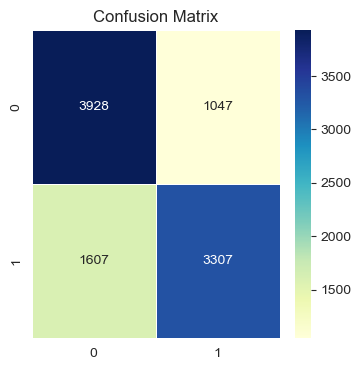

True Positive Cases: 3307
True Negative Cases: 3928
False Positive Cases: 1047
False Negative Cases: 1607
CPU times: total: 20.8 s
Wall time: 1h 52min 29s


In [77]:
%%time
xgboost_cython(trainx, trainy, testx, testy)

---
#### ◉ LGBM (Python)

[LightGBM] [Info] Number of positive: 22104, number of negative: 22723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 44827, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493096 -> initscore=-0.027619
[LightGBM] [Info] Start training from score -0.027619
[LightGBM] [Info] Number of positive: 22104, number of negative: 22723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 44827, number of used features: 12
[LightGBM] [Info] [b

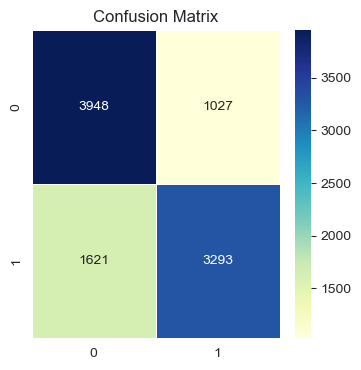

True Positive Cases: 3293
True Negative Cases: 3948
False Positive Cases: 1027
False Negative Cases: 1621
CPU times: total: 1h 12min 42s
Wall time: 25min 11s


In [78]:
%%time
# Define the LightGBM model
model = LGBMClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 1e-1, 1, 10],
    'reg_lambda': [0, 1e-1, 1, 10]
}

# Create Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best parameters
grid_search.fit(trainx, trainy)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_model = LGBMClassifier(random_state=42, **best_params)
best_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = best_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = best_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ LGBM (Cython + Parallelized GridSearchCV Process)

In [79]:
%%cython -a
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, fbeta_score, precision_score, recall_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from joblib import parallel_backend
import seaborn as sns
cimport numpy as np
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)

def lightgbm_cython(np.ndarray[np.float64_t, ndim=2] trainx, np.ndarray[np.int64_t, ndim=1] trainy, np.ndarray[np.float64_t, ndim=2] testx, np.ndarray[np.int64_t, ndim=1] testy):
    # Define the LightGBM model
    model = LGBMClassifier(random_state=42)

    # Define the parameter grid for Grid Search
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 7, -1],  # -1 means no limit
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0, 1e-1, 1, 10],
        'reg_lambda': [0, 1e-1, 1, 10]
    }

    with parallel_backend('multiprocessing', n_jobs=-1):
        # Create Grid Search with cross-validation
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

        # Fit the model to find the best parameters
        grid_search.fit(trainx, trainy)

    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Use the best parameters to create the final model
    best_model = LGBMClassifier(random_state=42, **best_params)
    best_model.fit(trainx, trainy)

    # Make predictions on the training set
    trainy_pred = best_model.predict(trainx)

    # Evaluate the model on the training set
    accuracy_train = accuracy_score(trainy, trainy_pred)
    print("Training Accuracy:", accuracy_train)

    # Make predictions on the test set
    testy_pred = best_model.predict(testx)

    # Evaluate the model on the test set
    accuracy = accuracy_score(testy, testy_pred)
    report = classification_report(testy, testy_pred, digits=5)
    auc = roc_auc_score(testy, testy_pred)
    f2 = fbeta_score(testy, testy_pred, beta=2)
    precision_per_class = precision_score(testy, testy_pred, average=None)
    f1 = fbeta_score(testy, testy_pred, beta=1)
    average_precision = average_precision_score(testy, testy_pred)
    weighted_recall = recall_score(testy, testy_pred, average='weighted')

    # Additional Metrics
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1-score:", f1)
    print("F2-score:", f2)
    print("Precision per class:", precision_per_class)
    print("Average Precision:", average_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Classification Report:\n", report)

    # Confusion Matrix Visualization
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.show()

    # True Positive, True Negative, False Positive, False Negative
    tp = confusion_matrix(testy, testy_pred)[1][1]
    tn = confusion_matrix(testy, testy_pred)[0][0]
    fp = confusion_matrix(testy, testy_pred)[0][1]
    fn = confusion_matrix(testy, testy_pred)[1][0]

    print('True Positive Cases: {}'.format(tp))
    print('True Negative Cases: {}'.format(tn))
    print('False Positive Cases: {}'.format(fp))
    print('False Negative Cases: {}'.format(fn))

Content of stdout:
_cython_magic_0f5d0f5c3250549ae1693e0146ea036fb962106a.c
C:\Users\Home\anaconda3\Lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
   Creating library C:\Users\Home\.ipython\cython\Users\Home\.ipython\cython\_cython_magic_0f5d0f5c3250549ae1693e0146ea036fb962106a.cp311-win_amd64.lib and object C:\Users\Home\.ipython\cython\Users\Home\.ipython\cython\_cython_magic_0f5d0f5c3250549ae1693e0146ea036fb962106a.cp311-win_amd64.exp
Generating code
Finished generating code

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.8}
Training Accuracy: 0.7289145875718314
Accuracy: 0.7316209930225503
AUC: 0.73126145583432
F1-score: 0.7136383254208027
F2-score: 0.6886713869221157
Precision per class: [0.70966576 0.75953147]
Average Precision: 0.6736496113455304
Weighted Average Recall: 0.7316209930225503
Classification Report:
               precision    recall  f1-score   support

           0    0.70967   0.78955   0.74748      4975
           1    0.75953   0.67298   0.71364      4914

    accuracy                        0.73162      9889
   macro avg    0.73460   0.73126   0.73056      9889
weighted avg    0.73444   0.73162   0.73066      9889



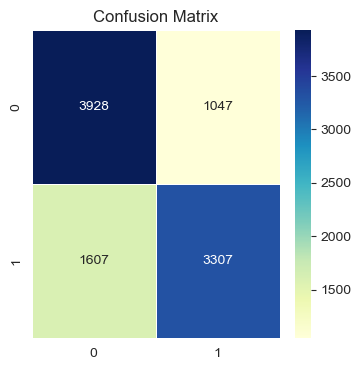

True Positive Cases: 3307
True Negative Cases: 3928
False Positive Cases: 1047
False Negative Cases: 1607
CPU times: total: 23.8 s
Wall time: 1h 53min 14s


In [80]:
%%time
xgboost_cython(trainx, trainy, testx, testy)

---
#### ◉ Ensemble (LGBM + RF + XGBoost)

[LightGBM] [Info] Number of positive: 27630, number of negative: 28404
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 56034, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493093 -> initscore=-0.027628
[LightGBM] [Info] Start training from score -0.027628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

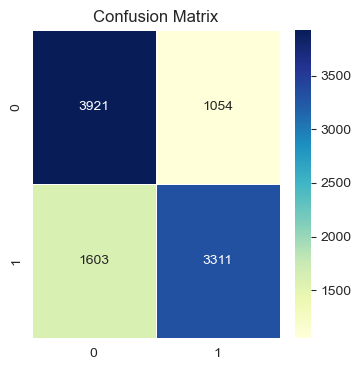

True Positive Cases: 3311
True Negative Cases: 3921
False Positive Cases: 1054
False Negative Cases: 1603
CPU times: total: 41.7 s
Wall time: 35.1 s


In [86]:
%%time
# Define individual models with parameters
lgbm_params = {
    'random_state': 42,
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'reg_alpha': 10,
    'reg_lambda': 1
}
lgbm_model = LGBMClassifier(**lgbm_params)

rf_params = {
    'random_state': 42,
    'n_estimators': 350,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 4
}
rf_model = RandomForestClassifier(**rf_params)

xgb_params = {
    'random_state': 42,
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'reg_alpha': 10,
    'reg_lambda': 1
}
xgb_model = XGBClassifier(**xgb_params)

# Create a voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # Use 'soft' for probability voting
)

# Fit the ensemble model to the training data
voting_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = voting_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = voting_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ TabNet (Python)

C:\Users\Home\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Home\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.60737 |  0:00:03s
epoch 1  | loss: 0.57016 |  0:00:06s
epoch 2  | loss: 0.56364 |  0:00:09s
epoch 3  | loss: 0.56214 |  0:00:12s
epoch 4  | loss: 0.5608  |  0:00:15s
epoch 5  | loss: 0.5599  |  0:00:18s
epoch 6  | loss: 0.5612  |  0:00:21s
epoch 7  | loss: 0.5593  |  0:00:24s
epoch 8  | loss: 0.55976 |  0:00:27s
epoch 9  | loss: 0.55753 |  0:00:30s
epoch 10 | loss: 0.55789 |  0:00:33s
epoch 11 | loss: 0.55759 |  0:00:36s
epoch 12 | loss: 0.55732 |  0:00:39s
epoch 13 | loss: 0.55776 |  0:00:42s
epoch 14 | loss: 0.55562 |  0:00:45s
epoch 15 | loss: 0.5561  |  0:00:48s
epoch 16 | loss: 0.55551 |  0:00:51s
epoch 17 | loss: 0.55464 |  0:00:54s
epoch 18 | loss: 0.55467 |  0:00:57s
epoch 19 | loss: 0.55593 |  0:01:00s
epoch 20 | loss: 0.55649 |  0:01:03s
epoch 21 | loss: 0.55824 |  0:01:06s
epoch 22 | loss: 0.55615 |  0:01:09s
epoch 23 | loss: 0.55477 |  0:01:12s
epoch 24 | loss: 0.5537  |  0:01:16s
epoch 25 | loss: 0.55432 |  0:01:19s
epoch 26 | loss: 0.55539 |  0:01:22s
e

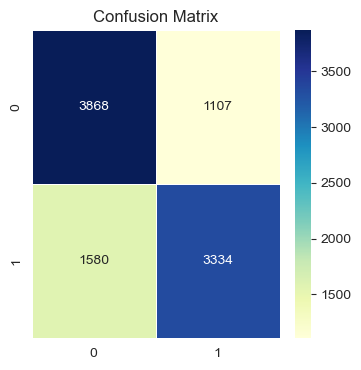

True Positive Cases: 3334
True Negative Cases: 3868
False Positive Cases: 1107
False Negative Cases: 1580


In [82]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Define TabNet parameters
tabnet_params = {
    # TabNet parameters
}

# Create a TabNet model
tabnet_model = TabNetClassifier(**tabnet_params)

# Fit the TabNet model to the training data
tabnet_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = tabnet_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = tabnet_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))


---
#### ◉ Optimized Neural Network (Python)

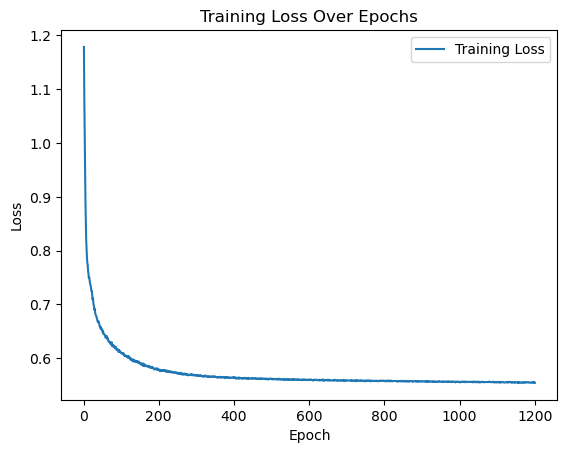

Training Accuracy: 0.7236320805225399
Accuracy: 0.7261603802204469
AUC: 0.7261299987933154
F1-score: 0.7235606369946918
F2-score: 0.7221452441111745
Precision per class: [0.72638306 0.725932  ]
Average Precision: 0.6620833513666782
Weighted Average Recall: 0.7261603802204469
Classification Report:
               precision    recall  f1-score   support

           0    0.72638   0.73106   0.72871      4975
           1    0.72593   0.72120   0.72356      4914

    accuracy                        0.72616      9889
   macro avg    0.72616   0.72613   0.72614      9889
weighted avg    0.72616   0.72616   0.72615      9889



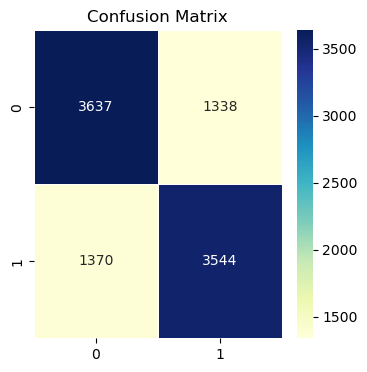

True Positive Cases: 3544
True Negative Cases: 3637
False Positive Cases: 1338
False Negative Cases: 1370
CPU times: total: 11min 1s
Wall time: 2min 55s


In [9]:
%%time
class ONN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.25):
        super(ONN, self).__init__()

        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.PReLU())  # Using PReLU as an advanced activation function
        layers.append(nn.BatchNorm1d(hidden_sizes[0]))
        layers.append(nn.Dropout(p=dropout_rate))

        for i in range(len(hidden_sizes) - 1):
            layers.append(self._make_layer(hidden_sizes[i], hidden_sizes[i+1], dropout_rate))

        self.hidden_layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
        self._initialize_weights()
        self.threshold = 0.5

    def _make_layer(self, in_features, out_features, dropout_rate):
        layer = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.PReLU(),
            nn.BatchNorm1d(out_features),
            nn.Dropout(p=dropout_rate)
        )
        return layer

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')  # He initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def set_threshold(self, threshold):
        self.threshold = threshold

    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x

    def predict(self, x):
        with torch.no_grad():
            self.eval()
            y_prob = F.softmax(self.forward(x), dim=1)  # Ensure to use self.forward
            y_pred = (y_prob[:, 1] > self.threshold).int().numpy()
        return y_pred

# Set the input, hidden, and output sizes
input_size = 12  # The number of features
hidden_sizes = [64, 128]
output_size = 2

# Create the neural network model
neural_net_model = ONN(input_size, hidden_sizes, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(neural_net_model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)

# Convert data to PyTorch tensors if not already
trainx_tensor = torch.Tensor(trainx)
trainy_tensor = torch.LongTensor(trainy)  # Assuming classification with integers

# Training the neural network
num_epochs = 1200
train_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = neural_net_model(trainx_tensor)
    loss = criterion(outputs, trainy_tensor)
    train_losses.append(loss.item())

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Evaluation on the training set
with torch.no_grad():
    neural_net_model.eval()
    trainy_pred = neural_net_model.predict(trainx_tensor)
    accuracy_train = accuracy_score(trainy, trainy_pred)
    print("Training Accuracy:", accuracy_train)

# Evaluation on the test set
testx_tensor = torch.Tensor(testx)
testy_tensor = torch.LongTensor(testy)
with torch.no_grad():
    neural_net_model.eval()
    neural_net_model.set_threshold(0.45)  # Adjust the threshold
    testy_pred = neural_net_model.predict(testx_tensor)
    # Evaluate the model on the test set
    accuracy = accuracy_score(testy, testy_pred)
    report = classification_report(testy, testy_pred, digits=5)
    auc = roc_auc_score(testy, testy_pred)
    f2 = fbeta_score(testy, testy_pred, beta=2)
    precision_per_class = precision_score(testy, testy_pred, average=None)
    f1 = fbeta_score(testy, testy_pred, beta=1)
    average_precision = average_precision_score(testy, testy_pred)
    weighted_recall = recall_score(testy, testy_pred, average='weighted')

    # Additional Metrics
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1-score:", f1)
    print("F2-score:", f2)
    print("Precision per class:", precision_per_class)
    print("Average Precision:", average_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Classification Report:\n", report)

    # Confusion Matrix Visualization
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.show()

    # True Positive, True Negative, False Positive, False Negative
    tp = confusion_matrix(testy, testy_pred)[1][1]
    tn = confusion_matrix(testy, testy_pred)[0][0]
    fp = confusion_matrix(testy, testy_pred)[0][1]
    fn = confusion_matrix(testy, testy_pred)[1][0]

    print('True Positive Cases: {}'.format(tp))
    print('True Negative Cases: {}'.format(tn))
    print('False Positive Cases: {}'.format(fp))
    print('False Negative Cases: {}'.format(fn))

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator

class PyTorchGridSearchWrapper(BaseEstimator):
    def __init__(self, input_size, num_epochs=1200, hidden_sizes=(64, 128), dropout_rate=0.25, threshold=0.45):
        self.input_size = input_size
        self.num_epochs = num_epochs
        self.hidden_sizes = hidden_sizes
        self.dropout_rate = dropout_rate
        self.threshold = threshold
        self.model = None

    # Setup the PyTorch model
    def _init_model(self):
        self.model = ONN(self.input_size, self.hidden_sizes, output_size, self.dropout_rate)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)

    # Fit method for GridSearchCV
    def fit(self, X, y):
        X_tensor = torch.Tensor(X)
        y_tensor = torch.LongTensor(y)
        self._init_model()

        for epoch in range(self.num_epochs):
            # Forward pass
            outputs = self.model(X_tensor)
            loss = self.criterion(outputs, y_tensor)

            # Backward and optimize
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return self

    # Predict method for GridSearchCV
    def predict(self, X):
        self.model.set_threshold(self.threshold)
        X_tensor = torch.Tensor(X)
        return self.model.predict(X_tensor)

# Custom scoring function that sklearn's GridSearchCV can use
def custom_score(estimator, X_test, y_true):
    y_pred = estimator.predict(X_test)
    return accuracy_score(y_true, y_pred)

# Parameter Grid to Search
param_grid = {
    'num_epochs': [1000, 1100, 1200],
    'hidden_sizes': [(32, 32), (32, 64), (64, 64), (64, 128)],
    'dropout_rate': [0.1, 0.25, 0.5],
    'threshold': [0.45, 0.5]
}

input_size = trainx.shape[1]
output_size = len(set(trainy))

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=PyTorchGridSearchWrapper(input_size=input_size),
                           param_grid=param_grid,
                           scoring=custom_score,
                           cv=5)

# Execute the grid search
grid_search.fit(trainx, trainy)

# The best hyperparameters
print(grid_search.best_params_)
best_model = grid_search.best_estimator_.model

{'dropout_rate': 0.25, 'hidden_sizes': (64, 128), 'num_epochs': 1200, 'threshold': 0.5}
